# Tony's extension for team3_sprint1_cleaned_dataset

In [1]:
%run team3_sprint1_ksi_pedestrian_cleaned_dataset_07_29.ipynb

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 6484 entries, 2006-01-02 07:05:00 to 2019-06-27 18:50:00
Data columns (total 74 columns):
 #   Column         Non-Null Count  Dtype              
---  ------         --------------  -----              
 0   Index_         6484 non-null   int64              
 1   ACCNUM         6484 non-null   int64              
 2   YEAR           6484 non-null   int64              
 3   DATE           6484 non-null   datetime64[ns, UTC]
 4   TIME           6484 non-null   int64              
 5   HOUR           6484 non-null   int64              
 6   STREET1        6484 non-null   object             
 7   STREET2        5897 non-null   object             
 8   OFFSET         916 non-null    object             
 9   ROAD_CLASS     6457 non-null   category           
 10  District       6482 non-null   category           
 11  WardNum        5464 non-null   category           
 12  Division       6484 non-null   int64              
 13  LATITUDE    

In [2]:
def long_listing(state):
    if state:
        #temp_max_rows = pd.options.display.max_rows
        pd.options.display.max_rows = 4000
    else:
        pd.options.display.max_rows = 60

# Let's examine Time aspect of this dataset

## Time vs District

### By Year

In [3]:
long_listing(True)
district_vs_year_in_fatality1 = df.groupby(['YEAR', 'District'])['ACCLASS'].value_counts()
district_vs_year_in_fatality1

YEAR  District               ACCLASS
2006  Etobicoke York         False       76
                             True        28
      North York             False      113
                             True        13
      Scarborough            False       93
                             True        21
      Toronto and East York  False      208
                             True        19
2007  Etobicoke York         False       74
                             True        11
      North York             False       83
                             True        12
      Scarborough            False      101
                             True        33
      Toronto and East York  False      176
                             True        20
2008  Etobicoke York         False       85
                             True        17
      North York             False      107
                             True        22
      Scarborough            False       76
                             True      

In [4]:
district_vs_year_in_fatality2 = df.groupby(['YEAR', 'District'])['ACCLASS'].value_counts(normalize=True) * 100
district_vs_year_in_fatality2

YEAR  District               ACCLASS
2006  Etobicoke York         False     73.08
                             True      26.92
      North York             False     89.68
                             True      10.32
      Scarborough            False     81.58
                             True      18.42
      Toronto and East York  False     91.63
                             True       8.37
2007  Etobicoke York         False     87.06
                             True      12.94
      North York             False     87.37
                             True      12.63
      Scarborough            False     75.37
                             True      24.63
      Toronto and East York  False     89.80
                             True      10.20
2008  Etobicoke York         False     83.33
                             True      16.67
      North York             False     82.95
                             True      17.05
      Scarborough            False     80.00
                  

### By Hour

In [5]:
district_vs_hour = df.groupby(['HOUR', 'District'])['ACCLASS'].value_counts()
district_vs_hour

HOUR  District               ACCLASS
0     North York             False        3
      Toronto and East York  True         3
1     Etobicoke York         False       25
                             True         9
      North York             False       29
                             True         7
      Scarborough            False        8
                             True         4
      Toronto and East York  False       77
                             True        12
2     Etobicoke York         False       30
                             True         3
      North York             False       23
      Scarborough            False       23
                             True         5
      Toronto and East York  False      101
                             True        15
3     Etobicoke York         False       15
                             True         2
      North York             False       19
                             True         6
      Scarborough            False     

In [6]:
long_listing(False)

# So What Causes Fatal Accidents? (ACCLASS)

there's a differentiation between 'ACCLASS' and 'INJURY', where ACCLASS is classifying the whole case to be Fatal/Non-fatal. Whereas, INJURY is related to every pedestrian instances in a case who acquired different level of injury.

## Fatal Accidents by Hour

In [7]:
acclass_by_hour = df.groupby(['HOUR'])['ACCLASS'].value_counts()
# acclass_by_hour

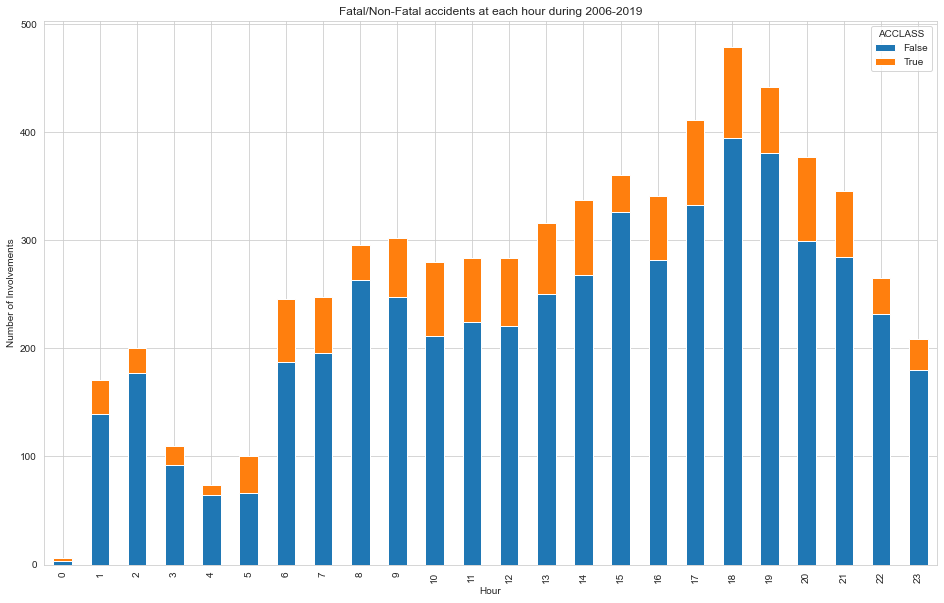

In [8]:
# plt.figure(figsize=(16,10))
ax = acclass_by_hour.unstack().plot.bar(stacked=True, figsize=(16,10))
ax.set_title('Fatal/Non-Fatal accidents at each hour during 2006-2019')
ax.set(xlabel='Hour', ylabel='Number of Involvements')
# ax.set_xticklabels(acclass_by_age.index.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

# Which district has more fatal accidents?

In [9]:
acclass_by_district1 = df.groupby('District')['ACCLASS'].value_counts()
acclass_by_district1

District               ACCLASS
Etobicoke York         False      1016
                       True        202
North York             False      1148
                       True        262
Scarborough            False      1077
                       True        345
Toronto and East York  False      2081
                       True        351
Name: ACCLASS, dtype: int64

In [10]:
acclass_by_district2 = df.groupby('District')['ACCLASS'].value_counts(normalize=True) * 100
acclass_by_district2

District               ACCLASS
Etobicoke York         False     83.42
                       True      16.58
North York             False     81.42
                       True      18.58
Scarborough            False     75.74
                       True      24.26
Toronto and East York  False     85.57
                       True      14.43
Name: ACCLASS, dtype: float64

Scarborough has a significantly higher fatality rate of 24.26% 

# Which type of Public Road has more fatal accidents?

In [11]:
acclass_by_road_class1 = df.groupby('ROAD_CLASS')['ACCLASS'].value_counts()
acclass_by_road_class1

ROAD_CLASS      ACCLASS
Collector       False       322
                True         57
Expressway      False        10
                True          3
Laneway         False         4
                True          4
Local           False       290
                True         59
Major Arterial  False      3835
                True        887
Minor Arterial  False       823
                True        147
Other           False        10
Pending         False         6
Name: ACCLASS, dtype: int64

In [12]:
acclass_by_road_class2 = df.groupby('ROAD_CLASS')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_road_class2

ROAD_CLASS      ACCLASS
Collector       False      84.96
                True       15.04
Expressway      False      76.92
                True       23.08
Laneway         False      50.00
                True       50.00
Local           False      83.09
                True       16.91
Major Arterial  False      81.22
                True       18.78
Minor Arterial  False      84.85
                True       15.15
Other           False     100.00
Pending         False     100.00
Name: ACCLASS, dtype: float64

# TODO: Why is there PEDESTRIAN crossing Collector/Expressway???

# Does more fatal accidents happen at intersection or Mid-Block (LOCCOORD)?

In [13]:
acclass_by_loccord1 = df.groupby('LOCCOORD')['ACCLASS'].value_counts()
acclass_by_loccord1

LOCCOORD      ACCLASS
Intersection  False      3655
              True        781
Mid-Block     False      1629
              True        381
Name: ACCLASS, dtype: int64

In [14]:
acclass_by_loccord2 = df.groupby('LOCCOORD')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_loccord2

LOCCOORD      ACCLASS
Intersection  False     82.39
              True      17.61
Mid-Block     False     81.04
              True      18.96
Name: ACCLASS, dtype: float64

as we said before 18% is the normal value for Fatality. This seems to fall into this "probability"

# Which collision locations contributes to more fatal accidents?

In [15]:
acclass_by_accloc1 = df.groupby('ACCLOC')['ACCLASS'].value_counts()
acclass_by_accloc1

ACCLOC                 ACCLASS
At Intersection        False      2602
                       True        522
At/Near Private Drive  False        87
                       True          9
Intersection Related   False       342
                       True         88
Laneway                False        11
                       True          2
Non Intersection       False       548
                       True        170
Overpass or Bridge     False         2
                       True          2
Private Driveway       False         6
Name: ACCLASS, dtype: int64

In [16]:
acclass_by_accloc2 = df.groupby('ACCLOC')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_accloc2

ACCLOC                 ACCLASS
At Intersection        False      83.29
                       True       16.71
At/Near Private Drive  False      90.62
                       True        9.38
Intersection Related   False      79.53
                       True       20.47
Laneway                False      84.62
                       True       15.38
Non Intersection       False      76.32
                       True       23.68
Overpass or Bridge     False      50.00
                       True       50.00
Private Driveway       False     100.00
Name: ACCLASS, dtype: float64

Again, a typical Fatal Accident rate is about 15-20%. If you get more data points, it seems will converge. However, we should be alerted for 'Non Intersection' where it has higher than 'usual' fatal rates.

# What about Traffic Control points vs Fatal Rating?

In [17]:
acclass_by_traffic_ctrl1 = df.groupby('TRAFFCTL')['ACCLASS'].value_counts()
acclass_by_traffic_ctrl1

TRAFFCTL              ACCLASS
No Control            False      2419
                      True        616
PXO - No Ped          False         2
Pedestrian Crossover  False       116
                      True         23
Police Control        False         2
School Guard          False         2
Stop Sign             False       365
                      True         71
Streetcar (Stop for)  False        16
Traffic Controller    False        20
Traffic Gate          True          3
                      False         2
Traffic Signal        False      2364
                      True        449
Yield Sign            False         7
Name: ACCLASS, dtype: int64

In [18]:
acclass_by_traffic_ctrl2 = df.groupby('TRAFFCTL')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_traffic_ctrl2

TRAFFCTL              ACCLASS
No Control            False      79.70
                      True       20.30
PXO - No Ped          False     100.00
Pedestrian Crossover  False      83.45
                      True       16.55
Police Control        False     100.00
School Guard          False     100.00
Stop Sign             False      83.72
                      True       16.28
Streetcar (Stop for)  False     100.00
Traffic Controller    False     100.00
Traffic Gate          True       60.00
                      False      40.00
Traffic Signal        False      84.04
                      True       15.96
Yield Sign            False     100.00
Name: ACCLASS, dtype: float64

With Ped Crossover, Stop Sign, Traffic Signal, we see we end up in the range of 15-20% Fatal Rate. When there has no traffic control we see both higher accidents and higher fatal rates.

# Does Road Conditions play an important role on Fatality Rate?

In [19]:
acclass_by_visibility1 = df.groupby('VISIBILITY')['ACCLASS'].value_counts()
acclass_by_visibility1

VISIBILITY              ACCLASS
Clear                   False      4370
                        True        938
Drifting Snow           False         6
Fog, Mist, Smoke, Dust  False        16
Freezing Rain           False        10
                        True          2
Other                   False        20
                        True         20
Rain                    False       804
                        True        164
Snow                    False        88
                        True         24
Strong wind             False         8
Name: ACCLASS, dtype: int64

In [20]:
acclass_by_visibility2 = df.groupby('VISIBILITY')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_visibility2

VISIBILITY              ACCLASS
Clear                   False      82.33
                        True       17.67
Drifting Snow           False     100.00
Fog, Mist, Smoke, Dust  False     100.00
Freezing Rain           False      83.33
                        True       16.67
Other                   False      50.00
                        True       50.00
Rain                    False      83.06
                        True       16.94
Snow                    False      78.57
                        True       21.43
Strong wind             False     100.00
Name: ACCLASS, dtype: float64

In [21]:
acclass_by_visibility3 = df['VISIBILITY'].value_counts(normalize=True)*100
acclass_by_visibility3

Clear                    82.04
Rain                     14.96
Snow                      1.73
Other                     0.62
Fog, Mist, Smoke, Dust    0.25
Freezing Rain             0.19
Strong wind               0.12
Drifting Snow             0.09
Name: VISIBILITY, dtype: float64

We expected more fatality rate for collision in snow. However, the number of accident is very low. In comparison, 82% of cases happen under Clear day! It is somewhat counterintuitive that we much higher cases during rain than snow. Maybe people are more prepared for snow driving than wet driving. This might be the area to be improved on.

# Is lighting conditions affect fatality

In [22]:
acclass_by_light_condition1 = df.groupby('LIGHT')['ACCLASS'].value_counts()
acclass_by_light_condition1

LIGHT                 ACCLASS
Dark                  False      1203
                      True        285
Dark, artificial      False       961
                      True        209
Dawn                  False        37
                      True          2
Dawn, artificial      False        41
                      True         11
Daylight              False      2869
                      True        609
Daylight, artificial  False        45
                      True         12
Dusk                  False        89
                      True         23
Dusk, artificial      False        77
                      True          9
Other                 True          2
Name: ACCLASS, dtype: int64

In [23]:
acclass_by_light_condition2 = df.groupby('LIGHT')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_light_condition2

LIGHT                 ACCLASS
Dark                  False      80.85
                      True       19.15
Dark, artificial      False      82.14
                      True       17.86
Dawn                  False      94.87
                      True        5.13
Dawn, artificial      False      78.85
                      True       21.15
Daylight              False      82.49
                      True       17.51
Daylight, artificial  False      78.95
                      True       21.05
Dusk                  False      79.46
                      True       20.54
Dusk, artificial      False      89.53
                      True       10.47
Other                 True      100.00
Name: ACCLASS, dtype: float64

Lighting conditions does not really play a significant role in determining whether accidents might occur, and it just happen as usual whether there is light or dark out.

On the other hand, if we look at this set of data, we have trouble understanding it, and it might also be difficult to collect this info. i.e. how do you define dusk/dawn/artificial? Everyone has a different answer.

# People blame Road Conditions causing serious accidents. Does this really has an effect?

In [24]:
acclass_by_road_conditions1 = df.groupby('RDSFCOND')['ACCLASS'].value_counts()
acclass_by_road_conditions1

RDSFCOND              ACCLASS
Dry                   False      4018
                      True        879
Ice                   False        15
                      True          2
Loose Sand or Gravel  False         3
Loose Snow            False        30
                      True          6
Other                 False        34
                      True         27
Packed Snow           False        11
                      True          2
Slush                 False        32
                      True          3
Wet                   False      1179
                      True        231
Name: ACCLASS, dtype: int64

In [25]:
acclass_by_road_conditions2 = df.groupby('RDSFCOND')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_road_conditions2

RDSFCOND              ACCLASS
Dry                   False      82.05
                      True       17.95
Ice                   False      88.24
                      True       11.76
Loose Sand or Gravel  False     100.00
Loose Snow            False      83.33
                      True       16.67
Other                 False      55.74
                      True       44.26
Packed Snow           False      84.62
                      True       15.38
Slush                 False      91.43
                      True        8.57
Wet                   False      83.62
                      True       16.38
Name: ACCLASS, dtype: float64

In [26]:
acclass_by_road_conditions3 = df['RDSFCOND'].value_counts(normalize=True)*100
acclass_by_road_conditions3

Dry                    75.66
Wet                    21.79
Other                   0.94
Loose Snow              0.56
Slush                   0.54
Ice                     0.26
Packed Snow             0.20
Loose Sand or Gravel    0.05
Name: RDSFCOND, dtype: float64

By looking at the number of cases and if we look at 'VISIBILITY' and 'RDSFCOND', we can conclude that +97% of cases happen on either a Dry/Wet Surface (or Clean/Rainy Day). This is a strong proof that accidents related to pedestrian are clearly human mistakes!!! On the contrary, for whatever reason, we have a low accident number with snow. Really interesting.

# How fatality and injury divide up across involvement type?

In [27]:
acclass_by_invtype1 = df.groupby('INVTYPE')['ACCLASS'].value_counts()
acclass_by_invtype1

INVTYPE               ACCLASS
Cyclist               False        15
Driver                False      2127
                      True        430
Driver - Not Hit      False         4
                      True          1
In-Line Skater        False         5
Motorcycle Driver     False        21
                      True          1
Other                 False        39
                      True          6
Other Property Owner  False        25
                      True          3
Passenger             False       307
                      True         83
Pedestrian            False      2228
                      True        487
Pedestrian - Not Hit  False         1
Trailer Owner         False         1
Truck Driver          False        74
                      True         40
Vehicle Owner         False       460
                      True        105
Wheelchair            False        11
                      True          2
Witness               True          1
Name: ACCLASS, dtype

In [28]:
acclass_by_invtype2 = df.groupby('INVTYPE')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_invtype2

INVTYPE               ACCLASS
Cyclist               False     100.00
Driver                False      83.18
                      True       16.82
Driver - Not Hit      False      80.00
                      True       20.00
In-Line Skater        False     100.00
Motorcycle Driver     False      95.45
                      True        4.55
Other                 False      86.67
                      True       13.33
Other Property Owner  False      89.29
                      True       10.71
Passenger             False      78.72
                      True       21.28
Pedestrian            False      82.06
                      True       17.94
Pedestrian - Not Hit  False     100.00
Trailer Owner         False     100.00
Truck Driver          False      64.91
                      True       35.09
Vehicle Owner         False      81.42
                      True       18.58
Wheelchair            False      84.62
                      True       15.38
Witness               True      10

Here, Passengers has high fatality rate than a normal pedestrians when it comes to accidents. 21.28% compared to 17.94%. Surprisingly, Truck Drivers has a very high fatality rate when it comes to pedestrian accidents.

# Let approach fatality in a different way. How injury is divided up across different involvement type?

In [29]:
invtype_by_injury1 = df.groupby('INJURY')['INVTYPE'].value_counts()
invtype_by_injury1

INJURY   INVTYPE             
Fatal    Pedestrian               441
         Wheelchair                 2
         Motorcycle Driver          1
         Passenger                  1
Major    Pedestrian              2118
         Driver                    38
         Wheelchair                11
         Passenger                 10
         Motorcycle Driver          7
         In-Line Skater             4
         Cyclist                    3
         Truck Driver               3
         Other                      1
Minimal  Driver                    70
         Pedestrian                43
         Passenger                 25
         Cyclist                    2
         Truck Driver               1
Minor    Pedestrian                90
         Driver                    54
         Passenger                 26
         Motorcycle Driver          6
         Cyclist                    2
         Other                      1
         Truck Driver               1
None     Driver     

In [30]:
invtype_by_injury2 = df.groupby('INJURY')['INVTYPE'].value_counts(normalize=True)*100
invtype_by_injury2

INJURY   INVTYPE             
Fatal    Pedestrian             99.10
         Wheelchair              0.45
         Motorcycle Driver       0.22
         Passenger               0.22
Major    Pedestrian             96.49
         Driver                  1.73
         Wheelchair              0.50
         Passenger               0.46
         Motorcycle Driver       0.32
         In-Line Skater          0.18
         Cyclist                 0.14
         Truck Driver            0.14
         Other                   0.05
Minimal  Driver                 49.65
         Pedestrian             30.50
         Passenger              17.73
         Cyclist                 1.42
         Truck Driver            0.71
Minor    Pedestrian             50.00
         Driver                 30.00
         Passenger              14.44
         Motorcycle Driver       3.33
         Cyclist                 1.11
         Other                   0.56
         Truck Driver            0.56
None     Driver     

When we look at injuries by involvements, we see there's a drastic different advantage point. Pedestrians are usually involves in VERY serious injuries while drivers and passenger suffer only minor to no injury. This is why we have to educate public about road safety. Even though drivers are having the most advantage, but there is a huge consequence to bear for life time.

# How age various with fatalty rate?

In [31]:
acclass_by_age = df.groupby('INVAGE')['ACCLASS'].value_counts()
acclass_by_age

INVAGE    ACCLASS
0 to 4    False       51
          True         7
10 to 14  False      100
          True        10
15 to 19  False      216
          True        33
20 to 24  False      428
          True        70
25 to 29  False      419
          True        78
30 to 34  False      360
          True        69
35 to 39  False      337
          True        57
40 to 44  False      358
          True        77
45 to 49  False      363
          True        69
5 to 9    False       58
          True        16
50 to 54  False      410
          True        85
55 to 59  False      329
          True        84
60 to 64  False      284
          True        67
65 to 69  False      255
          True        65
70 to 74  False      204
          True        56
75 to 79  False      166
          True        64
80 to 84  False      123
          True        51
85 to 89  False       75
          True        39
90 to 94  False       16
          True        16
Over 95   True         6
       

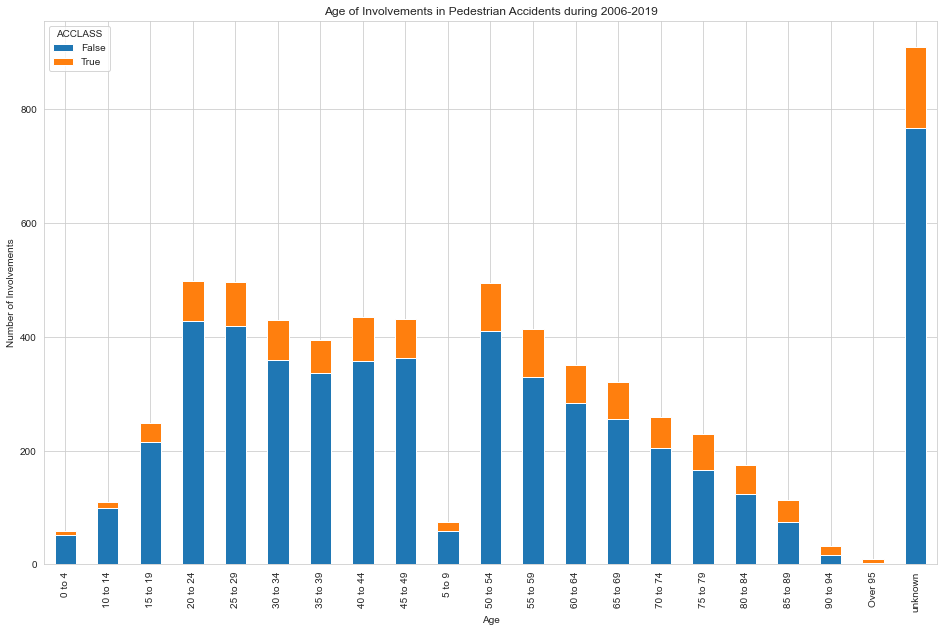

In [32]:
#ax = acclass_by_age2.plot.bar(stacked=True, figsize=(16,10));
# for p in ax.patches:
#     ax.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha= 'center', va = 'center', xytext = (0,10), textcoords = 'offset points')
#plt.show();

# plt.figure(figsize=(16,10))
ax = acclass_by_age.unstack().plot.bar(stacked=True, figsize=(16,10))
ax.set_title('Age of Involvements in Pedestrian Accidents during 2006-2019')
ax.set(xlabel='Age', ylabel='Number of Involvements')
# ax.set_xticklabels(acclass_by_age.index.values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.show();

In [33]:
acclass_by_age2 = df.groupby('INVAGE')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_age2

INVAGE    ACCLASS
0 to 4    False     87.93
          True      12.07
10 to 14  False     90.91
          True       9.09
15 to 19  False     86.75
          True      13.25
20 to 24  False     85.94
          True      14.06
25 to 29  False     84.31
          True      15.69
30 to 34  False     83.92
          True      16.08
35 to 39  False     85.53
          True      14.47
40 to 44  False     82.30
          True      17.70
45 to 49  False     84.03
          True      15.97
5 to 9    False     78.38
          True      21.62
50 to 54  False     82.83
          True      17.17
55 to 59  False     79.66
          True      20.34
60 to 64  False     80.91
          True      19.09
65 to 69  False     79.69
          True      20.31
70 to 74  False     78.46
          True      21.54
75 to 79  False     72.17
          True      27.83
80 to 84  False     70.69
          True      29.31
85 to 89  False     65.79
          True      34.21
90 to 94  False     50.00
          True      

For a simple argument, if we use the 18% as the nominal fatality rate, you have lower fatality when you are < age 54 except for the age of 5-9 group. You can see as involvement age gets younger you has more higher chance of survival. However, if you are age 55 and above, you have a high fatality rate and you get much higher risk when you are above 75

# How does Severity of Injury related to Fatal/Non-Fatal Classification of cases?

In [34]:
acclass_by_injury1 = df.groupby('INJURY')['ACCLASS'].value_counts()
acclass_by_injury1

INJURY   ACCLASS
Fatal    True        445
Major    False      2168
         True         27
Minimal  False       127
         True         14
Minor    False       131
         True         49
None     False      2446
         True        513
Name: ACCLASS, dtype: int64

In [35]:
acclass_by_injury2 = df.groupby('INJURY')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_injury2

INJURY   ACCLASS
Fatal    True      100.00
Major    False      98.77
         True        1.23
Minimal  False      90.07
         True        9.93
Minor    False      72.78
         True       27.22
None     False      82.66
         True       17.34
Name: ACCLASS, dtype: float64

In [36]:
injury_by_acclass1 = df.groupby(['ACCLASS', ])['INJURY'].value_counts()
injury_by_acclass1

ACCLASS  INJURY 
False    None       2446
         Major      2168
         Minor       131
         Minimal     127
True     None        513
         Fatal       445
         Minor        49
         Major        27
         Minimal      14
Name: INJURY, dtype: int64

In [37]:
injury_by_acclass2 = df.groupby('ACCLASS')['INJURY'].value_counts(normalize=True)*100
injury_by_acclass2

ACCLASS  INJURY 
False    None      50.21
         Major     44.50
         Minor      2.69
         Minimal    2.61
True     None      48.95
         Fatal     42.46
         Minor      4.68
         Major      2.58
         Minimal    1.34
Name: INJURY, dtype: float64

see the above section for how Injury various with involvement types.

# How does causality spread across with pedestrian accidents?

In [38]:
long_listing(True)
group_fatal_number = df.groupby(['INVTYPE', 'INJURY', 'ACCLASS'])['FATAL_NO'].nunique()
group_fatal_number[group_fatal_number > 0]

INVTYPE            INJURY  ACCLASS
Motorcycle Driver  Fatal   True        1
Passenger          Fatal   True        1
Pedestrian         Fatal   True       75
Wheelchair         Fatal   True        2
Name: FATAL_NO, dtype: int64

TPS has given sequential number for causality cases, and these are tallied number and you can see pedestrian is the most vulnerable group then the wheelchair-bounded pedestrian.

# What type of vehicle that causes most fatality?

In [39]:
acclass_by_vehtype1 = df.groupby('VEHTYPE')['ACCLASS'].value_counts()
acclass_by_vehtype1

VEHTYPE                           ACCLASS
Automobile, Station Wagon         False      1916
                                  True        325
Bicycle                           False        15
Bus (Other) (Go Bus, Gray Coach)  False         3
                                  True          2
Construction Equipment            False         2
Delivery Van                      False        18
                                  True         13
Fire Vehicle                      False         1
Intercity Bus                     False         2
                                  True          2
Motorcycle                        False        21
                                  True          1
Municipal Transit Bus (TTC)       False        91
                                  True         28
Other                             False      2011
                                  True        318
Passenger Van                     False        22
                                  True         22
Pick Up 

In [40]:
acclass_by_vehtype2 = df.groupby('VEHTYPE')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_vehtype2

VEHTYPE                           ACCLASS
Automobile, Station Wagon         False      85.50
                                  True       14.50
Bicycle                           False     100.00
Bus (Other) (Go Bus, Gray Coach)  False      60.00
                                  True       40.00
Construction Equipment            False     100.00
Delivery Van                      False      58.06
                                  True       41.94
Fire Vehicle                      False     100.00
Intercity Bus                     False      50.00
                                  True       50.00
Motorcycle                        False      95.45
                                  True        4.55
Municipal Transit Bus (TTC)       False      76.47
                                  True       23.53
Other                             False      86.35
                                  True       13.65
Passenger Van                     False      50.00
                                  True  

TTC, Pickup truck, Street Car, Taxi, Trucks all contribute to very serious pedestrian accidents. Although automobiles has the most accident cases, but fatality is below the 18% mark.

# Does Driver's Action and 'Reaction' has something to do fatality rate?

In [41]:
acclass_by_drivact1 = df.groupby('DRIVACT')['ACCLASS'].value_counts()
acclass_by_drivact1

DRIVACT                       ACCLASS
Disobeyed Traffic Control     False        80
                              True         14
Driving Properly              False      1019
                              True        257
Exceeding Speed Limit         False        28
                              True         10
Failed to Yield Right of Way  False       698
                              True        104
Following too Close           False         8
                              True          1
Improper Lane Change          False        10
                              True          4
Improper Passing              False        12
                              True          3
Improper Turn                 False        87
                              True         14
Lost control                  False        69
                              True         26
Other                         False       152
                              True         37
Speed too Fast For Condition  False       

In [42]:
acclass_by_drivact2 = df.groupby('DRIVACT')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_drivact2

DRIVACT                       ACCLASS
Disobeyed Traffic Control     False      85.11
                              True       14.89
Driving Properly              False      79.86
                              True       20.14
Exceeding Speed Limit         False      73.68
                              True       26.32
Failed to Yield Right of Way  False      87.03
                              True       12.97
Following too Close           False      88.89
                              True       11.11
Improper Lane Change          False      71.43
                              True       28.57
Improper Passing              False      80.00
                              True       20.00
Improper Turn                 False      86.14
                              True       13.86
Lost control                  False      72.63
                              True       27.37
Other                         False      80.42
                              True       19.58
Speed too Fast For Con

Not surprising that 'Exceeding Speed Limit', 'Improper Lane Change', 'Improper Passing', 'Lost Control' contributes to fatal collisions more than any other modes. Although number of accidents are lower, but they are more lethal and of more concerns.

In [43]:
acclass_by_manoeuver1 = df.groupby('MANOEUVER')['ACCLASS'].value_counts()
acclass_by_manoeuver1

MANOEUVER                            ACCLASS
Changing Lanes                       False        26
                                     True          9
Disabled                             False         3
Going Ahead                          False      1264
                                     True        313
Making U Turn                        False         9
Merging                              False         2
Other                                False        77
                                     True          6
Overtaking                           False         8
Parked                               False        23
                                     True          2
Pulling Away from Shoulder or Curb   False        13
                                     True          1
Pulling Onto Shoulder or towardCurb  False         1
Reversing                            False        69
                                     True         16
Slowing or Stopping                  False        37
 

In [44]:
acclass_by_manoeuver2 = df.groupby('MANOEUVER')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_manoeuver2

MANOEUVER                            ACCLASS
Changing Lanes                       False      74.29
                                     True       25.71
Disabled                             False     100.00
Going Ahead                          False      80.15
                                     True       19.85
Making U Turn                        False     100.00
Merging                              False     100.00
Other                                False      92.77
                                     True        7.23
Overtaking                           False     100.00
Parked                               False      92.00
                                     True        8.00
Pulling Away from Shoulder or Curb   False      92.86
                                     True        7.14
Pulling Onto Shoulder or towardCurb  False     100.00
Reversing                            False      81.18
                                     True       18.82
Slowing or Stopping                  

# Finally, we look at how different pedestrian crash types and the fatality rate with different crash types.

In [45]:
acclass_by_pedtype1 = df.groupby('PEDTYPE')['ACCLASS'].value_counts()
acclass_by_drivact1

DRIVACT                       ACCLASS
Disobeyed Traffic Control     False        80
                              True         14
Driving Properly              False      1019
                              True        257
Exceeding Speed Limit         False        28
                              True         10
Failed to Yield Right of Way  False       698
                              True        104
Following too Close           False         8
                              True          1
Improper Lane Change          False        10
                              True          4
Improper Passing              False        12
                              True          3
Improper Turn                 False        87
                              True         14
Lost control                  False        69
                              True         26
Other                         False       152
                              True         37
Speed too Fast For Condition  False       

In [46]:
acclass_by_pedtype2 = df.groupby('PEDTYPE')['ACCLASS'].value_counts(normalize=True)*100
acclass_by_drivact2

DRIVACT                       ACCLASS
Disobeyed Traffic Control     False      85.11
                              True       14.89
Driving Properly              False      79.86
                              True       20.14
Exceeding Speed Limit         False      73.68
                              True       26.32
Failed to Yield Right of Way  False      87.03
                              True       12.97
Following too Close           False      88.89
                              True       11.11
Improper Lane Change          False      71.43
                              True       28.57
Improper Passing              False      80.00
                              True       20.00
Improper Turn                 False      86.14
                              True       13.86
Lost control                  False      72.63
                              True       27.37
Other                         False      80.42
                              True       19.58
Speed too Fast For Con

Other crash mode has pretty low counts, but vehicle lost control is something to look into. 
There are things drivers can avoid i.e. 'Exceeding Speed Limit', 'Failed to Yield Right of Way'. But most drivers claim they are 'Driving Properly'

# For Fatal Accidents, does the actions and conditions of Drivers and Pedestrians play a role?

## Conditions for Both Parties

In [47]:
long_listing(False)
dp_conditions = df[df['ACCLASS']][['DRIVCOND', 'PEDCOND']].reset_index()
dp_conditions

,DATE_TIME,DRIVCOND,PEDCOND
0,2006-01-08 18:28:00,NaN,NaN
1,2006-01-08 18:28:00,NaN,NaN
2,2006-01-08 18:28:00,NaN,NaN
3,2006-01-08 18:28:00,NaN,NaN
4,2006-01-08 18:28:00,Normal,NaN
...,...,...,...
1157,2019-04-06 09:07:00,Normal,NaN
1158,2019-06-20 13:15:00,NaN,Normal
1159,2019-06-20 13:15:00,"Ability Impaired, Drugs",NaN
1160,2019-06-26 09:02:00,Unknown,NaN


## METHOD 1: USING ACCLASS TO FILTER: Drivers and Pedestrain Conditions for Fatal Accidents (ACCLASS = True => Fatal)

In [48]:
dc = dp_conditions['DRIVCOND'].value_counts().sort_values(ascending=False)
dc

Normal                                284
Inattentive                            85
Unknown                                74
Had Been Drinking                      10
Ability Impaired, Alcohol Over .08      7
Medical or Physical Disability          4
Ability Impaired, Alcohol               2
Ability Impaired, Drugs                 2
Fatigue                                 2
Other                                   1
Name: DRIVCOND, dtype: int64

In [49]:
pc = dp_conditions['PEDCOND'].value_counts().sort_values(ascending=False)
pc

Normal                                194
Unknown                               153
Inattentive                            78
Had Been Drinking                      25
Medical or Physical Disability         18
Other                                  12
Ability Impaired, Alcohol               4
Ability Impaired, Alcohol Over .80      1
Ability Impaired, Drugs                 0
Fatigue                                 0
Name: PEDCOND, dtype: int64

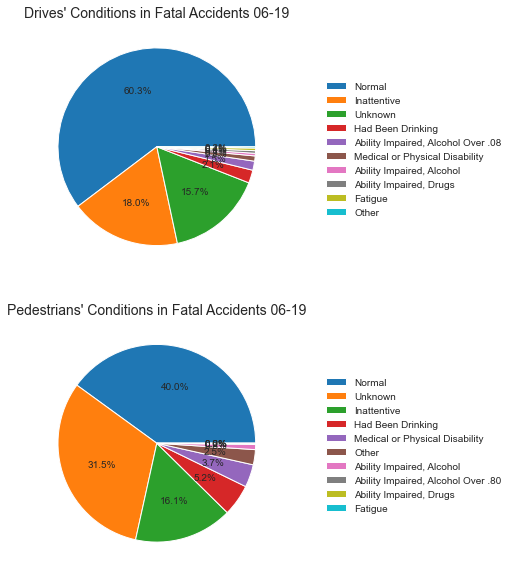

In [50]:
fig, ax= plt.subplots(2,1,figsize=(12,10))
dc.plot(kind='pie', ax=ax[0], autopct='%1.1f%%', labels=None)
#ax[0].legend(frameon=False, bbox_to_anchor=(1.5,0.8))
pc.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', labels=None)
#ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

ax[0].set_title('Drives\' Conditions in Fatal Accidents 06-19', size=14)
ax[0].set_ylabel('')
ax[0].legend(frameon=False, bbox_to_anchor=(1.15,0.8), labels=dc.index)
ax[1].set_title('Pedestrians\' Conditions in Fatal Accidents 06-19', size=14)
ax[1].set_ylabel('')
ax[1].legend(frameon=False, bbox_to_anchor=(1.15,0.8), labels=pc.index)
plt.plot();

A good portion of the parties' condition are unknown at the scene. But also, normal and inattentive are also predominate, which consist of 60.3+18 = 78.3% for drivers and 40+16.1 = 56.1% for pedestrians. This again proves both parties are careless in most cases.

## METHOD 2: USING INVOLVEMENT INJURY CASES TO FILTER: Drivers and Pedestrain Conditions for Fatal Accidents (ACCLASS = True => Fatal)

In [51]:
dp_conditions2 = df[df['INJURY'] == 'Fatal'][['DRIVCOND', 'PEDCOND']].reset_index()
dp_conditions2

,DATE_TIME,DRIVCOND,PEDCOND
0,2006-01-08 18:28:00,NaN,Normal
1,2006-01-09 14:35:00,NaN,Unknown
2,2006-01-21 18:29:00,NaN,Normal
3,2006-01-24 07:54:00,NaN,Normal
4,2006-01-29 20:48:00,NaN,Unknown
...,...,...,...
440,2019-03-07 09:01:00,NaN,NaN
441,2019-03-29 06:30:00,NaN,Other
442,2019-04-06 09:07:00,NaN,Normal
443,2019-06-20 13:15:00,NaN,Normal


In [52]:
dc2 = dp_conditions2['DRIVCOND'].value_counts().sort_values(ascending=False)
dc2

Normal                                1
Ability Impaired, Alcohol             0
Ability Impaired, Alcohol Over .08    0
Ability Impaired, Drugs               0
Fatigue                               0
Had Been Drinking                     0
Inattentive                           0
Medical or Physical Disability        0
Other                                 0
Unknown                               0
Name: DRIVCOND, dtype: int64

In [53]:
pc2 = dp_conditions2['PEDCOND'].value_counts().sort_values(ascending=False)
pc2

Normal                                169
Unknown                               134
Inattentive                            77
Had Been Drinking                      25
Medical or Physical Disability         17
Other                                  12
Ability Impaired, Alcohol               4
Ability Impaired, Alcohol Over .80      1
Ability Impaired, Drugs                 0
Fatigue                                 0
Name: PEDCOND, dtype: int64

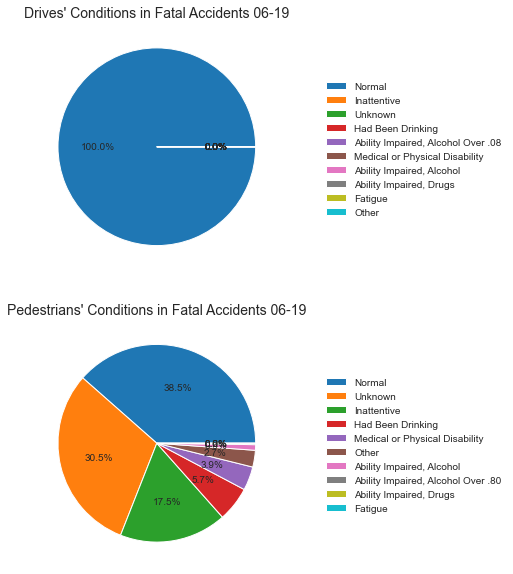

In [54]:
fig, ax= plt.subplots(2,1,figsize=(12,10))
dc2.plot(kind='pie', ax=ax[0], autopct='%1.1f%%', labels=None)
#ax[0].legend(frameon=False, bbox_to_anchor=(1.5,0.8))
pc2.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', labels=None)
#ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

ax[0].set_title('Drives\' Conditions in Fatal Accidents 06-19', size=14)
ax[0].set_ylabel('')
ax[0].legend(frameon=False, bbox_to_anchor=(1.15,0.8), labels=dc.index)
ax[1].set_title('Pedestrians\' Conditions in Fatal Accidents 06-19', size=14)
ax[1].set_ylabel('')
ax[1].legend(frameon=False, bbox_to_anchor=(1.15,0.8), labels=pc.index)
plt.plot();

Using INVOLVEMENT'S Injury condition cannot prove the situation, because we think the surveyor cannot really get the pedestrian's condition at the scene, and it is due to the seriousness of the injury.

## Actions for Both Parties

In [55]:
dp_actions = df[df['ACCLASS']][['DRIVACT', 'PEDACT']].reset_index()
dp_actions

,DATE_TIME,DRIVACT,PEDACT
0,2006-01-08 18:28:00,NaN,NaN
1,2006-01-08 18:28:00,NaN,NaN
2,2006-01-08 18:28:00,NaN,NaN
3,2006-01-08 18:28:00,NaN,NaN
4,2006-01-08 18:28:00,Failed to Yield Right of Way,NaN
...,...,...,...
1157,2019-04-06 09:07:00,Failed to Yield Right of Way,NaN
1158,2019-06-20 13:15:00,NaN,On Sidewalk or Shoulder
1159,2019-06-20 13:15:00,Lost control,NaN
1160,2019-06-26 09:02:00,Driving Properly,NaN


In [56]:
da= dp_actions['DRIVACT'].value_counts().sort_values(ascending=False)
da

Driving Properly                257
Failed to Yield Right of Way    104
Other                            37
Lost control                     26
Disobeyed Traffic Control        14
Improper Turn                    14
Exceeding Speed Limit            10
Improper Lane Change              4
Improper Passing                  3
Speed too Fast For Condition      2
Following too Close               1
Wrong Way on One Way Road         0
Name: DRIVACT, dtype: int64

In [57]:
pa = dp_actions['PEDACT'].value_counts().sort_values(ascending=False)
pa

Crossing, no Traffic Control             163
Crossing with right of way               118
Crossing without right of way             57
On Sidewalk or Shoulder                   53
Other                                     35
Running onto Roadway                      21
Crossing, Pedestrian Crossover             9
Coming From Behind Parked Vehicle          6
Walking on Roadway Against Traffic         6
Crossing marked crosswalk without ROW      5
Person Getting on/off Vehicle              5
Walking on Roadway with Traffic            5
Playing or Working on Highway              3
Pushing/Working on Vehicle                 3
Person Getting on/off School Bus           0
Name: PEDACT, dtype: int64

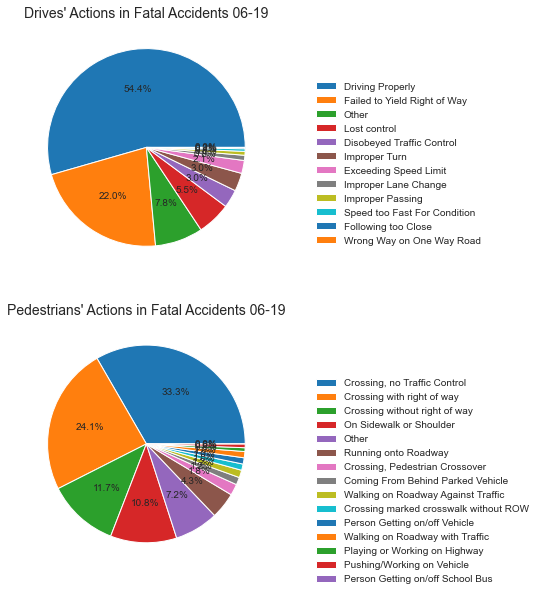

In [58]:
fig, ax= plt.subplots(2,1,figsize=(12,10))
da.plot(kind='pie', ax=ax[0], autopct='%1.1f%%', labels=None)
#ax[0].legend(frameon=False, bbox_to_anchor=(1.5,0.8))
pa.plot(kind='pie', ax=ax[1], autopct='%1.1f%%', labels=None)
#ax.legend(frameon=False, bbox_to_anchor=(1.5,0.8))

ax[0].set_title('Drives\' Actions in Fatal Accidents 06-19', size=14)
ax[0].set_ylabel('')
ax[0].legend(frameon=False, bbox_to_anchor=(1.15,0.8), labels=da.index)
ax[1].set_title('Pedestrians\' Actions in Fatal Accidents 06-19', size=14)
ax[1].set_ylabel('')
ax[1].legend(frameon=False, bbox_to_anchor=(1.15,0.8), labels=pa.index)
plt.plot();

As we can see for fatal collisions, drivers claims to be driving properly most of the time (54%). On the other hand, pedestrians' actions seem to be more at fault, i.e. crossing with no traffic control and crossing without right of way and running onto roadway. This contributes to (33.3+11.7+4.3) = 49.3%.

That makes the argument that although pedestrians are in vulnerable group, but they are also part of the road user that contribute to road safety. It is easy to get yourself kill is most cases if you as a pedestrian is not careful about road safety. 

# Let's take a look again at how road conditions contributes to severity of injury

In [59]:
injury_by_visibility1 = df.groupby('VISIBILITY')['INJURY'].value_counts()
injury_by_visibility1

VISIBILITY              INJURY 
Clear                   None       2415
                        Major      1790
                        Fatal       355
                        Minor       158
                        Minimal     120
Drifting Snow           Major         3
                        None          3
Fog, Mist, Smoke, Dust  None          7
                        Major         6
                        Minimal       1
Freezing Rain           None          6
                        Major         5
                        Fatal         1
Other                   None         19
                        Fatal        10
                        Major        10
Rain                    None        455
                        Major       340
                        Fatal        63
                        Minor        19
                        Minimal      16
Snow                    None         48
                        Major        37
                        Fatal         9
        

In [60]:
injury_by_visibility2 = df.groupby('VISIBILITY')['INJURY'].value_counts(normalize=True)*100
injury_by_visibility2

VISIBILITY              INJURY 
Clear                   None      49.92
                        Major     37.00
                        Fatal      7.34
                        Minor      3.27
                        Minimal    2.48
Drifting Snow           Major     50.00
                        None      50.00
Fog, Mist, Smoke, Dust  None      50.00
                        Major     42.86
                        Minimal    7.14
Freezing Rain           None      50.00
                        Major     41.67
                        Fatal      8.33
Other                   None      48.72
                        Fatal     25.64
                        Major     25.64
Rain                    None      50.95
                        Major     38.07
                        Fatal      7.05
                        Minor      2.13
                        Minimal    1.79
Snow                    None      48.48
                        Major     37.37
                        Fatal      9.09
        

This follows the same 15-20% fatality rules. It's also interesting to note most cases happens in a Clear Day 5000+ involvement where as on a rainy day we have ~1000 and snowy day we have ~100. This indicates that people actually drive more carefully during bad weather. On the flip side, if people can driver more carefully, we can avoid many more accidents and cost associated.

In [61]:
injury_by_light_condition1 = df.groupby('LIGHT')['INJURY'].value_counts()
injury_by_light_condition1

LIGHT                 INJURY 
Dark                  None        681
                      Major       482
                      Fatal       112
                      Minor        36
                      Minimal      27
Dark, artificial      None        575
                      Major       407
                      Fatal        87
                      Minor        28
                      Minimal      27
Dawn                  None         17
                      Major        14
                      Fatal         1
                      Minimal       1
                      Minor         1
Dawn, artificial      None         26
                      Major        16
                      Fatal         5
                      Minor         1
Daylight              None       1535
                      Major      1189
                      Fatal       220
                      Minor       111
                      Minimal      83
Daylight, artificial  None         30
                    

In [62]:
injury_by_light_condition2 = df.groupby('LIGHT')['INJURY'].value_counts(normalize=True)*100
injury_by_light_condition2

LIGHT                 INJURY 
Dark                  None      50.90
                      Major     36.02
                      Fatal      8.37
                      Minor      2.69
                      Minimal    2.02
Dark, artificial      None      51.16
                      Major     36.21
                      Fatal      7.74
                      Minor      2.49
                      Minimal    2.40
Dawn                  None      50.00
                      Major     41.18
                      Fatal      2.94
                      Minimal    2.94
                      Minor      2.94
Dawn, artificial      None      54.17
                      Major     33.33
                      Fatal     10.42
                      Minor      2.08
Daylight              None      48.92
                      Major     37.89
                      Fatal      7.01
                      Minor      3.54
                      Minimal    2.64
Daylight, artificial  None      53.57
                    

In [63]:
injury_by_road_conditions1 = df.groupby('RDSFCOND')['INJURY'].value_counts()
injury_by_road_conditions1

RDSFCOND              INJURY 
Dry                   None       2213
                      Major      1650
                      Fatal       330
                      Minor       153
                      Minimal     112
Ice                   None          9
                      Major         6
                      Fatal         1
Loose Sand or Gravel  Major         1
                      Minimal       1
                      None          1
Loose Snow            None         16
                      Major        13
                      Fatal         2
                      Minimal       1
Other                 None         30
                      Major        16
                      Fatal        13
Packed Snow           None          6
                      Major         4
                      Fatal         1
Slush                 None         17
                      Major        10
                      Minor         2
                      Fatal         1
                    

In [64]:
injury_by_road_conditions2 = df.groupby('RDSFCOND')['INJURY'].value_counts(normalize=True)*100
injury_by_road_conditions2

RDSFCOND              INJURY 
Dry                   None      49.64
                      Major     37.01
                      Fatal      7.40
                      Minor      3.43
                      Minimal    2.51
Ice                   None      56.25
                      Major     37.50
                      Fatal      6.25
Loose Sand or Gravel  Major     33.33
                      Minimal   33.33
                      None      33.33
Loose Snow            None      50.00
                      Major     40.62
                      Fatal      6.25
                      Minimal    3.12
Other                 None      50.85
                      Major     27.12
                      Fatal     22.03
Packed Snow           None      54.55
                      Major     36.36
                      Fatal      9.09
Slush                 None      54.84
                      Major     32.26
                      Minor      6.45
                      Fatal      3.23
                    

This again verifies the previous argument, accidents happens on a normal day, with normal road conditions. For other bad road conditions, we actually have significantly lower number of accidents. And Fatality rate is still in the 15-20% range. 

It seems quite weird in cases for 'Other' surface condition, and we see somewhat high numbers in cases and rates. 27/34 Fatal/Non-Fatal cases. 

In [65]:
long_listing(True)
#df.groupby(['ACCNUM')['INVTYPE', 'ACCLASS', 'INJURY'].value_counts()
test = df.groupby(['INVTYPE', 'INJURY', 'ACCLASS'])['ACCNUM'].nunique()
test[test > 0]

INVTYPE               INJURY   ACCLASS
Cyclist               Major    False         3
                      Minimal  False         2
                      Minor    False         2
                      None     False         8
Driver                Major    False        33
                               True          5
                      Minimal  False        56
                               True          7
                      Minor    False        34
                               True         16
                      None     False      1901
                               True        379
Driver - Not Hit      None     False         3
                               True          1
In-Line Skater        Major    False         4
                      None     False         1
Motorcycle Driver     Fatal    True          1
                      Major    False         7
                      Minor    False         6
                      None     False         8
Other                

In [66]:
long_listing(False)

looking at the above grouping, we understand that are not too many "Fatal" Involvement for all involvement type except for pedestrians. Let's look at this comparison group... 

```
Driver                Fatal    False         0
                               True          0
                      Major    False        33
                               True          5
                      Minimal  False        56
                               True          7
                      Minor    False        34
                               True         16
                      None     False      1901
                               True        379
```

whereas 

```
Pedestrian            Fatal    False         0
                               True        438
                      Major    False      2054
                               True         17
                      Minimal  False        33
                               True          5
                      Minor    False        66
                               True         16
                      None     False        18
                               True          2
```

so, drivers are at the very advantageous situation, but pedestrians are not so fortunate. This chart makes a very strong contrast


In [67]:
long_listing(False)

# What type of Pedestrian will be hit hard?

In [68]:
long_listing(True)
group_ped_type = df.groupby(['PEDTYPE', 'INJURY', 'ACCLASS'])['ACCNUM'].nunique()

In [69]:
group_ped_type[group_ped_type > 0]

PEDTYPE                                                                                       INJURY   ACCLASS
Other / Undefined                                                                             Fatal    True         8
                                                                                              Major    False       52
                                                                                                       True         1
                                                                                              Minimal  False        1
                                                                                              Minor    False        2
                                                                                              None     False        1
Pedestrian hit a PXO/ped. Mid-block signal                                                    Fatal    True         8
                                                               

In [70]:
long_listing(False)

In [71]:
group_ped_type2 = df.groupby(['PEDTYPE'])['ACCNUM'].nunique().reset_index()
group_ped_type2

,PEDTYPE,ACCNUM
0,Other / Undefined,63
1,Pedestrian hit a PXO/ped. Mid-block signal,53
2,Pedestrian hit at mid-block,623
3,Pedestrian hit at parking lot,3
4,Pedestrian hit at private driveway,35
5,Pedestrian hit on sidewalk or shoulder,145
6,Pedestrian involved in a collision with transi...,126
7,Unknown,15
8,Vehicle hits the pedestrian walking or running...,22
9,Vehicle is going straight thru inter.while ped...,124


In [72]:
group_ped_type2.PEDTYPE

0                                     Other / Undefined
1            Pedestrian hit a PXO/ped. Mid-block signal
2                           Pedestrian hit at mid-block
3                         Pedestrian hit at parking lot
4                    Pedestrian hit at private driveway
5                Pedestrian hit on sidewalk or shoulder
6     Pedestrian involved in a collision with transi...
7                                               Unknown
8     Vehicle hits the pedestrian walking or running...
9     Vehicle is going straight thru inter.while ped...
10    Vehicle is going straight thru inter.while ped...
11             Vehicle is reversing and hits pedestrian
12    Vehicle turns left while ped crosses with ROW ...
13    Vehicle turns left while ped crosses without R...
14    Vehicle turns right while ped crosses with ROW...
15    Vehicle turns right while ped crosses without ...
Name: PEDTYPE, dtype: category
Categories (16, object): [Other / Undefined, Pedestrian hit a PXO/ped. Mi

In [73]:
my_pedtype_category = pd.DataFrame({'category': ['Other', 'Unknown', 'Pedestrian', 'Vehicle']})
pat = ('Other', 'Unknown', 'Pedestrian', 'Vehicle')
pat

('Other', 'Unknown', 'Pedestrian', 'Vehicle')

In [74]:
pat =  '('+'|'.join(my_pedtype_category['category'].str.split().str[-1])+')'
group_ped_type2['cat'] = group_ped_type2['PEDTYPE'].str.extract(pat).fillna('other')

In [75]:
group_ped_type2

,PEDTYPE,ACCNUM,cat
0,Other / Undefined,63,Other
1,Pedestrian hit a PXO/ped. Mid-block signal,53,Pedestrian
2,Pedestrian hit at mid-block,623,Pedestrian
3,Pedestrian hit at parking lot,3,Pedestrian
4,Pedestrian hit at private driveway,35,Pedestrian
5,Pedestrian hit on sidewalk or shoulder,145,Pedestrian
6,Pedestrian involved in a collision with transi...,126,Pedestrian
7,Unknown,15,Unknown
8,Vehicle hits the pedestrian walking or running...,22,Vehicle
9,Vehicle is going straight thru inter.while ped...,124,Vehicle


In [76]:
test = group_ped_type2.groupby('cat')['ACCNUM'].sum()
test

cat
Other           63
Pedestrian     985
Unknown         15
Vehicle       1332
Name: ACCNUM, dtype: int64

we roughly categorize the relationship between Pedestrian and Vehicle, and we 'roughly' split ped/veh into 7.4/10.
(this relationship is not very apparent)

# How about Driving Behaviors that leads fatal accidents?

In [77]:
driving_behaviors_list

['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']

In [78]:
for i in driving_behaviors_list:
    a = df[df[i]]
    grouped = a.groupby(i)['ACCLASS'].value_counts()
    #grouped.filter()
    print(grouped)
    print()

SPEEDING  ACCLASS
True      False      238
          True        81
Name: ACCLASS, dtype: int64

AG_DRIV  ACCLASS
True     False      2265
         True        421
Name: ACCLASS, dtype: int64

REDLIGHT  ACCLASS
True      False      199
          True        34
Name: ACCLASS, dtype: int64

ALCOHOL  ACCLASS
True     False      113
         True        25
Name: ACCLASS, dtype: int64

DISABILITY  ACCLASS
True        False      30
            True       18
Name: ACCLASS, dtype: int64



In [79]:
for i in driving_behaviors_list:
    a = df[df[i]]
    grouped = a.groupby(i)['ACCLASS'].value_counts(normalize=True)*100
    #grouped.filter()
    print(grouped)
    print()

SPEEDING  ACCLASS
True      False     74.61
          True      25.39
Name: ACCLASS, dtype: float64

AG_DRIV  ACCLASS
True     False     84.33
         True      15.67
Name: ACCLASS, dtype: float64

REDLIGHT  ACCLASS
True      False     85.41
          True      14.59
Name: ACCLASS, dtype: float64

ALCOHOL  ACCLASS
True     False     81.88
         True      18.12
Name: ACCLASS, dtype: float64

DISABILITY  ACCLASS
True        False     62.50
            True      37.50
Name: ACCLASS, dtype: float64



Interesting results from driving behavior
1. Speeding has defintely higher fatality rate. But the numbers of convictions are relatively.
2. Aggressive driving dominate the conviction number. but fatality rate is in a reasonable range.
3. Red Light seems representative for both numbers and fatality rate. This seems to be a typical number
4. Alcohol impaired is relatively low with numbers and rates. It is the merits of public education over the years.
5. Disabled Driver is actually shocking. Although number is low, but it's lethal.

# What type of vehicles these people drive?

In [80]:
agrouped = df.groupby('VEHTYPE')[['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']].agg({'SPEEDING':'sum', 'AG_DRIV':'sum', 'REDLIGHT':'sum', 'ALCOHOL':'sum', 'DISABILITY':'sum'})
#agrouped[agrouped > 0]
agrouped

,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
VEHTYPE,,,,,
"Automobile, Station Wagon",112.00,981.00,89.00,48.00,16.00
Bicycle,0.00,0.00,0.00,0.00,0.00
"Bus (Other) (Go Bus, Gray Coach)",0.00,3.00,0.00,0.00,0.00
Construction Equipment,0.00,0.00,0.00,0.00,0.00
Delivery Van,1.00,18.00,0.00,1.00,0.00
Fire Vehicle,0.00,0.00,0.00,0.00,0.00
Intercity Bus,0.00,0.00,0.00,0.00,0.00
Motorcycle,4.00,7.00,0.00,0.00,0.00
Municipal Transit Bus (TTC),4.00,32.00,2.00,1.00,0.00


So, automobile and 'other' has taken up all the credits. But what is 'other'? Formula 1 racer on the street? This does not really help... 

# Will driving behaviors affected by time

In [81]:
tgrouped = df.groupby('HOUR')[['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']].agg({'SPEEDING':'sum', 'AG_DRIV':'sum', 'REDLIGHT':'sum', 'ALCOHOL':'sum', 'DISABILITY':'sum'})
#agrouped[agrouped > 0]
tgrouped

,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
HOUR,,,,,
0,0.00,6.00,0.00,0.00,0.00
1,25.00,50.00,0.00,13.00,0.00
2,43.00,80.00,2.00,39.00,0.00
3,2.00,30.00,5.00,6.00,0.00
4,6.00,20.00,3.00,6.00,0.00
5,18.00,45.00,2.00,3.00,0.00
6,7.00,98.00,7.00,0.00,7.00
7,5.00,92.00,4.00,0.00,0.00
8,9.00,158.00,18.00,0.00,0.00


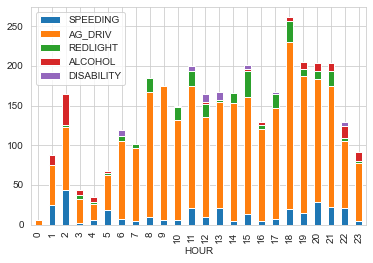

In [82]:
tgrouped.plot.bar(stacked=True);

It is apparent that people do speeding and 'drink and drive' at nighttime, but more aggressive driving and running thru red light during daytime.

# If Automobile and Other types of vehciles are dominating the scene, what time and places will they appear?

In [83]:
df[df['VEHTYPE'] == 'Automobile, Station Wagon']['PEDESTRIAN'].count()

2241

In [84]:
df[df['VEHTYPE'] == 'Other']['PEDESTRIAN'].count()

2329

In [85]:
automobile_filter = (df['VEHTYPE'] == 'Automobile, Station Wagon') 
other_filter = (df['VEHTYPE'] == 'Other')

df_vehtype_auto_only = df[automobile_filter] 
df_vehtype_other_only = df[other_filter]

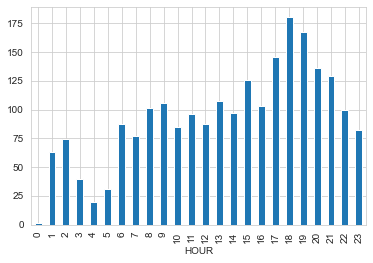

In [86]:
df_vehtype_auto_only.groupby('HOUR')['VEHTYPE'].count().plot.bar();

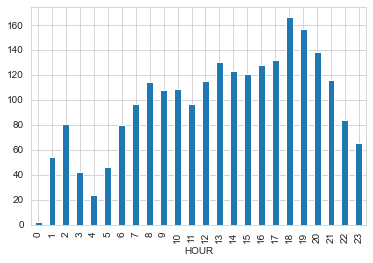

In [87]:
df_vehtype_other_only.groupby('HOUR')['VEHTYPE'].count().plot.bar();

Maybe VEHTYPE == 'Other' should be more fine-grain. As you can see, they both has very similar number and patterns.

# TODO - we can look into the locations where driver's behaviors might be affected?

# How does Severity of Injury and Drivers' Behaviors Related

In [88]:
bgrouped = df.groupby('INJURY')[['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']].agg({'SPEEDING':'sum', 'AG_DRIV':'sum', 'REDLIGHT':'sum', 'ALCOHOL':'sum', 'DISABILITY':'sum'})
#agrouped[agrouped > 0]
bgrouped

,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
INJURY,,,,,
Fatal,26.00,155.00,13.00,9.00,4.00
Major,87.00,930.00,68.00,41.00,16.00
Minimal,20.00,75.00,24.00,6.00,3.00
Minor,22.00,102.00,14.00,12.00,0.00
None,136.00,1195.00,97.00,56.00,18.00


Alcohol and Disabled Driver combined make up 'redlight' accidents. And Speeding and Redlight has similar damage. But the most staggering effect is still aggressive driving. It's 'off-the-chart' and alot of 'regular' people go pretty crazy with their cars.

# What are the actions that Drivers Behaviors falls into

In [89]:
actgrouped = df.groupby('DRIVACT')[['SPEEDING', 'AG_DRIV', 'REDLIGHT', 'ALCOHOL', 'DISABILITY']].agg({'SPEEDING':'sum', 'AG_DRIV':'sum', 'REDLIGHT':'sum', 'ALCOHOL':'sum', 'DISABILITY':'sum'})
#agrouped[agrouped > 0]
actgrouped

,SPEEDING,AG_DRIV,REDLIGHT,ALCOHOL,DISABILITY
DRIVACT,,,,,
Disobeyed Traffic Control,5.00,94.00,74.00,3.00,0.00
Driving Properly,26.00,128.00,21.00,9.00,5.00
Exceeding Speed Limit,38.00,38.00,0.00,5.00,1.00
Failed to Yield Right of Way,14.00,802.00,3.00,10.00,0.00
Following too Close,1.00,9.00,0.00,1.00,0.00
Improper Lane Change,0.00,1.00,0.00,0.00,0.00
Improper Passing,1.00,15.00,0.00,1.00,0.00
Improper Turn,2.00,6.00,1.00,0.00,1.00
Lost control,10.00,20.00,0.00,10.00,9.00


So, 'Aggressive Driving' is highlighted by 'Failed to Yield Right of Way' with 802. And it's the most standing out feature!!! And people 'Driving Properly' is also considered an act of 'Aggressive Driving'

# How the vehicle manoeuver might has impact on the severity of injury?

In [90]:
injury_by_manoeuver1 = df.groupby('MANOEUVER')['INJURY'].value_counts()
injury_by_manoeuver1

MANOEUVER                            INJURY 
Changing Lanes                       None         31
                                     Major         2
                                     Fatal         1
                                     Minor         1
Disabled                             None          2
                                     Major         1
Going Ahead                          None       1425
                                     Major        53
                                     Minimal      50
                                     Minor        41
                                     Fatal         3
Making U Turn                        None          7
                                     Major         1
                                     Minimal       1
Merging                              None          2
Other                                Major        53
                                     None         24
                                     Minor         3
 

# What are the actions of driver and Pedestrian during an accident? and How this leads to fatality?

In [91]:
df_actions = df[['ACCNUM', 'DRIVACT', 'PEDACT', 'ACCLASS', 'INJURY']]
# df_actions

In [92]:
grouped = df_actions.groupby('ACCNUM')

for name, group in grouped:
    # print(name)
    print(group)

alse  Major
                         ACCNUM        DRIVACT                      PEDACT  \
DATE_TIME                                                                    
2019-09-10 09:59:00  9001734593            NaN  Crossing with right of way   
2019-09-10 09:59:00  9001734593  Improper Turn                         NaN   

                     ACCLASS INJURY  
DATE_TIME                            
2019-09-10 09:59:00     True  Fatal  
2019-09-10 09:59:00     True   None  
                         ACCNUM                       DRIVACT PEDACT  ACCLASS  \
DATE_TIME                                                                       
2019-09-11 20:56:00  9001746758  Failed to Yield Right of Way    NaN    False   
2019-09-11 20:56:00  9001746758                           NaN    NaN    False   

                    INJURY  
DATE_TIME                   
2019-09-11 20:56:00   None  
2019-09-11 20:56:00  Major  
                         ACCNUM           DRIVACT PEDACT  ACCLASS INJURY
DATE_TIME

In [93]:
df_actions_fatal = df_actions[df_actions['ACCLASS']]
#df_actions_fatal

In [94]:
grouped2 = df_actions_fatal.groupby('ACCNUM')

for name, group in grouped2:
    # print(name)
    print(group)

mns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty DataFrame
Columns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty DataFrame
Columns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty DataFrame
Columns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty DataFrame
Columns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty DataFrame
Columns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty DataFrame
Columns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty DataFrame
Columns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty DataFrame
Columns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty DataFrame
Columns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty DataFrame
Columns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty DataFrame
Columns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty DataFrame
Columns: [ACCNUM, DRIVACT, PEDACT, ACCLASS, INJURY]
Index: []
Empty 

This "query" doesn't really work. And logical, driver should bear all the action that causes fatal injuries

# How Type of Involvements affected by 'Location Class' i.e. ROAD_CLASS, LOCCOORD, ACCLOC

In [95]:
location_class_list

['ROAD_CLASS', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL']

In [96]:
#for i in location_class_list:
#    print(df.groupby([i, 'INVTYPE']).size().unstack())

let's do it one by one, the printout can't read... 

In [97]:
df.groupby(['INVTYPE', 'ROAD_CLASS', ]).size().unstack()

ROAD_CLASS,Collector,Expressway,Laneway,Local,Major Arterial,Minor Arterial,Other,Pending
INVTYPE,,,,,,,,
Cyclist,0,0,0,1,12,2,0,0
Driver,154,6,3,133,1859,386,4,3
Driver - Not Hit,0,0,0,0,4,0,0,0
In-Line Skater,0,0,0,2,3,0,0,0
Motorcycle Driver,1,0,0,0,17,4,0,0
Other,2,0,0,10,21,12,0,0
Other Property Owner,0,0,0,0,22,6,0,0
Passenger,17,0,1,22,308,41,0,1
Pedestrian,165,7,3,144,1963,416,4,2


In [98]:
df.groupby(['INVTYPE', 'LOCCOORD', ]).size().unstack()

LOCCOORD,Intersection,Mid-Block
INVTYPE,,
Cyclist,10,5
Driver,1762,779
Driver - Not Hit,2,3
In-Line Skater,4,1
Motorcycle Driver,13,9
Other,20,24
Other Property Owner,19,9
Passenger,265,124
Pedestrian,1870,827


In [99]:
df.groupby(['INVTYPE', 'ACCLOC', ]).size().unstack()

ACCLOC,At Intersection,At/Near Private Drive,Intersection Related,Laneway,Non Intersection,Overpass or Bridge,Private Driveway
INVTYPE,,,,,,,
Cyclist,7,0,1,0,0,0,0
Driver,1249,39,185,5,300,2,3
Driver - Not Hit,1,0,1,0,1,0,0
In-Line Skater,4,0,0,0,0,0,0
Motorcycle Driver,9,0,0,0,4,0,0
Other,14,0,2,0,2,0,0
Other Property Owner,12,0,0,0,0,0,0
Passenger,176,9,41,1,85,0,0
Pedestrian,1312,44,194,7,313,2,3


In [100]:
df.groupby(['INVTYPE', 'TRAFFCTL', ]).size().unstack()

TRAFFCTL,No Control,PXO - No Ped,Pedestrian Crossover,Police Control,School Guard,Stop Sign,Streetcar (Stop for),Traffic Controller,Traffic Gate,Traffic Signal,Yield Sign
INVTYPE,,,,,,,,,,,
Cyclist,6,0,0,0,0,1,1,0,0,7,0
Driver,1178,1,60,1,1,173,5,7,0,1125,3
Driver - Not Hit,3,0,0,0,0,0,1,0,0,1,0
In-Line Skater,2,0,0,0,0,2,0,0,0,1,0
Motorcycle Driver,17,0,0,0,0,3,0,0,0,2,0
Other,31,0,0,0,0,0,0,0,2,12,0
Other Property Owner,11,0,0,0,0,0,0,0,0,17,0
Passenger,186,0,8,0,0,35,1,0,0,160,0
Pedestrian,1255,1,58,1,1,184,6,10,2,1190,3
